<a href="https://colab.research.google.com/github/marshtin/rockblast/blob/main/colab/gps_co07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import pandas.io.sql as sqlio
import sqlalchemy
from IPython.display import display
from connect import *
import warnings
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [3]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [4]:
conn = connect()
cur = conn.cursor()
cur.execute('SELECT version()')
db_version = cur.fetchone()
print(db_version)

Connecting to the PostgreSQL database...
Connected
('PostgreSQL 16.2 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-12), 64-bit',)


In [5]:
## Downloading data from AWS
print("Gathering data")
df = sqlio.read_sql_query("SELECT * FROM sandbox.gps_c07 WHERE elevation != 0 AND speed > 0", conn)
df_0 = sqlio.read_sql_query("SELECT * FROM sandbox.gps_c07 WHERE elevation != 0 AND speed = 0", conn)

Gathering data


In [6]:
x = df['latitude'].to_list()
y = df['longitude'].to_list()
z = df['elevation'].to_list()
s = df['speed'].to_list()

x0 = df_0['latitude'].to_list()
y0 = df_0['longitude'].to_list()
z0 = df_0['elevation'].to_list()

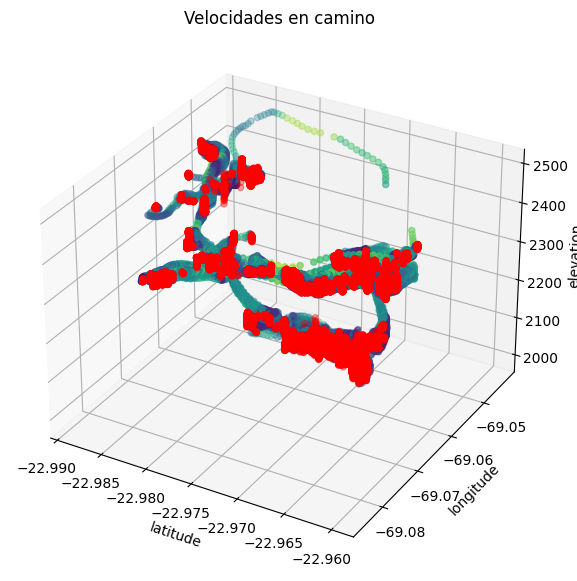

In [7]:
# Creating figure
fig = plt.figure(figsize = (100, 7))
ax = plt.axes(projection ="3d")

# Creating plot
p = ax.scatter3D(x, y, z, c = s, cmap = 'viridis')
q = ax.scatter3D(x0, y0, z0, color = 'red')
plt.title("Velocidades en camino")
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('elevation')
#fig.colorbar(p)

# show plot
plt.show()

In [8]:
##Closing connection
close_conn(conn)

Database connection closed.
